<a href="https://colab.research.google.com/github/Alxate024/Proyecto-Ia-exploratorio/blob/main/ANALISIS_DE_BASE_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/Grupos_de_Investigaci_n_Reconocidos_20250814.csv')

#  Inspección inicial
print("📌 Información general:")
print(df.info())
print("\n📊 Estadísticas descriptivas:")
print(df.describe())

📌 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30051 entries, 0 to 30050
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_CONVOCATORIA       30051 non-null  int64  
 1   NME_CONVOCATORIA      30051 non-null  object 
 2   ANO_CONVO             30051 non-null  object 
 3   COD_GRUPO_GR          30051 non-null  object 
 4   NME_GRUPO_GR          30047 non-null  object 
 5   FCREACION_GR          30051 non-null  object 
 6   NME_MUNICIPIO_GR      30051 non-null  object 
 7   NME_DEPARTAMENTO_GR   30051 non-null  object 
 8   NME_REGION_GR         30051 non-null  object 
 9   NME_PAIS_GR           30051 non-null  object 
 10  COD_DANE_GR           29781 non-null  float64
 11  ID_AREA_CON_GR        30051 non-null  object 
 12  NME_AREA_ESP_GR       30051 non-null  object 
 13  NME_AREA_GR           30051 non-null  object 
 14  NME_GRAN_AREA_GR      30051 non-null  object 
 

In [ ]:
df.head(50)

,ID_CONVOCATORIA,NME_CONVOCATORIA,ANO_CONVO,COD_GRUPO_GR,NME_GRUPO_GR,FCREACION_GR,NME_MUNICIPIO_GR,NME_DEPARTAMENTO_GR,NME_REGION_GR,NME_PAIS_GR,...,ID_AREA_CON_GR,NME_AREA_ESP_GR,NME_AREA_GR,NME_GRAN_AREA_GR,NME_CLASIFICACION_GR,ORDEN_CLAS_GR,EDAD_ANOS_GR,INST_AVAL,NME_PROG_COLC1_GR,NME_PROG_COLC2_GR
0,16,Convocatoria 640 de 2013,31/10/2013,COL0016283,Socialización y violencia,01/02/1993,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,5I,No registra,Otras Ciencias Sociales,Ciencias Sociales,C,2,21.00,UNIVERSIDAD CENTRAL,"Ciencia, Tecnología e Innovación en Ciencias H...","Ciencia, Tecnología e Innovación en Educación"
1,16,Convocatoria 640 de 2013,31/10/2013,COL0018751,ECITRONICA,01/01/2002,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,2B,No registra,"Ingenierías Eléctrica, Electrónica e Informática",Ingeniería y Tecnología,C,2,12.08,ESCUELA COLOMBIANA DE INGENIERIA JULIO GARAVITO,"Ciencia, Tecnología e Innovación en Tecnología...",Desarrollo Tecnológico e Innovación Industrial
2,16,Convocatoria 640 de 2013,31/10/2013,COL0013334,Línea de Investigación en Jóvenes y Culturas J...,01/06/1995,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,5D,No registra,Sociología,Ciencias Sociales,D,1,18.67,UNIVERSIDAD CENTRAL,"Ciencia, Tecnología e Innovación en Ciencias H...","Ciencia, Tecnología e Innovación en Educación"
3,16,Convocatoria 640 de 2013,31/10/2013,COL0013316,Género y Cultura,01/09/1998,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,5I,No registra,Otras Ciencias Sociales,Ciencias Sociales,C,2,15.42,UNIVERSIDAD CENTRAL,"Ciencia, Tecnología e Innovación en Ciencias H...","Ciencia, Tecnología e Innovación en Educación"
4,16,Convocatoria 640 de 2013,31/10/2013,COL0014583,Pavimentos y Materiales de Ingeniería,01/12/2002,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,2A,No registra,Ingeniería Civil,Ingeniería y Tecnología,D,1,11.17,UNIVERSIDAD CATOLICA DE COLOMBIA,"Ciencia, Tecnología e innovación en Ambiente, ...",Desarrollo Tecnológico e Innovación Industrial
5,16,Convocatoria 640 de 2013,31/10/2013,COL0008764,Grupo de Investigacion en Gestión Industrial GEGI,01/06/2002,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,2K,No registra,Otras Ingenierías y Tecnologías,Ingeniería y Tecnología,D,1,11.67,UNIVERSIDAD CATOLICA DE COLOMBIA,Desarrollo Tecnológico e Innovación Industrial,"Ciencia, Tecnología e Innovación en Ciencias H..."
6,16,Convocatoria 640 de 2013,31/10/2013,COL0020571,"Palabra, pueblo y vida",01/12/1998,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,6E,No registra,Otras Humanidades,Humanidades,D,1,15.17,CORPORACION UNIVERSITARIA MINUTO DE DIOS UNIMI...,"Ciencia, Tecnología e Innovación en Ciencias H...",No Aplica
7,16,Convocatoria 640 de 2013,31/10/2013,COL0005584,GIP,01/01/1995,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,2K,No registra,Otras Ingenierías y Tecnologías,Ingeniería y Tecnología,C,2,19.08,UNIVERSIDAD CATOLICA DE COLOMBIA,Desarrollo Tecnológico e Innovación Industrial,No Aplica
8,16,Convocatoria 640 de 2013,31/10/2013,COL0022164,Grupo de Virología,01/01/1999,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,3B,No registra,Medicina Clínica,Ciencias Médicas y de la Salud,A1,5,15.08,UNIVERSIDAD EL BOSQUE,"Ciencia, Tecnología e Innovación en Salud",Biotecnología
9,16,Convocatoria 640 de 2013,31/10/2013,COL0024534,Investigación y Desarrollo en Operación del Tr...,01/06/2003,Tunja,Boyacá,Centro Oriente,Colombia,...,2A,No registra,Ingeniería Civil,Ingeniería y Tecnología,B,3,10.67,UNIVERSIDAD PEDAGOGICA Y TECNOLOGICA DE COLOMBIA,"Ciencia, Tecnología e Innovación en Ciencias H...","Ciencia, Tecnología e innovación en Ambiente, ..."


In [ ]:
df.isnull().sum()



,0
ID_CONVOCATORIA,0
NME_CONVOCATORIA,0
ANO_CONVO,0
COD_GRUPO_GR,0
NME_GRUPO_GR,4
FCREACION_GR,0
NME_MUNICIPIO_GR,0
NME_DEPARTAMENTO_GR,0
NME_REGION_GR,0
NME_PAIS_GR,0


In [ ]:
# limpieza de datos

df_limpio = df.dropna()

print(df_limpio.isnull().sum())

df_limpio.to_csv("/content/Grupos_de_Investigacion_Limpio.csv", index=False)
print("\n📁 Archivo limpio guardado como 'Grupos_de_Investigacion_Limpio.csv'")

ID_CONVOCATORIA         0
NME_CONVOCATORIA        0
ANO_CONVO               0
COD_GRUPO_GR            0
NME_GRUPO_GR            0
FCREACION_GR            0
NME_MUNICIPIO_GR        0
NME_DEPARTAMENTO_GR     0
NME_REGION_GR           0
NME_PAIS_GR             0
COD_DANE_GR             0
ID_AREA_CON_GR          0
NME_AREA_ESP_GR         0
NME_AREA_GR             0
NME_GRAN_AREA_GR        0
NME_CLASIFICACION_GR    0
ORDEN_CLAS_GR           0
EDAD_ANOS_GR            0
INST_AVAL               0
NME_PROG_COLC1_GR       0
NME_PROG_COLC2_GR       0
dtype: int64

📁 Archivo limpio guardado como 'Grupos_de_Investigacion_Limpio.csv'


In [ ]:
# Variables Normalizadas

#  Seleccionar solo columnas numéricas
df_numericas = df.select_dtypes(include=["int64", "float64"])

# Normalización Min-Max (valores entre 0 y 1)
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_numericas),
                         columns=df_numericas.columns)

# 4. Estandarización Z-score (media=0, desviación estándar=1)
scaler_std = StandardScaler()
df_std = pd.DataFrame(scaler_std.fit_transform(df_numericas),
                      columns=df_numericas.columns)

# 5. Mostrar ejemplos
print("Normalización Min-Max:")
print(df_minmax.head())

print("\nEstandarización Z-score:")
print(df_std.head())


Normalización Min-Max:
   ID_CONVOCATORIA  COD_DANE_GR  ORDEN_CLAS_GR  EDAD_ANOS_GR
0              0.0      0.06383            0.4      0.195675
1              0.0      0.06383            0.4      0.108795
2              0.0      0.06383            0.2      0.172981
3              0.0      0.06383            0.4      0.141327
4              0.0      0.06383            0.2      0.099932

Estandarización Z-score:
   ID_CONVOCATORIA  COD_DANE_GR  ORDEN_CLAS_GR  EDAD_ANOS_GR
0        -1.610671    -0.616464      -0.416129      1.188706
1        -1.610671    -0.616464      -0.416129     -0.090656
2        -1.610671    -0.616464      -1.159726      0.854523
3        -1.610671    -0.616464      -0.416129      0.388388
4        -1.610671    -0.616464      -1.159726     -0.221174


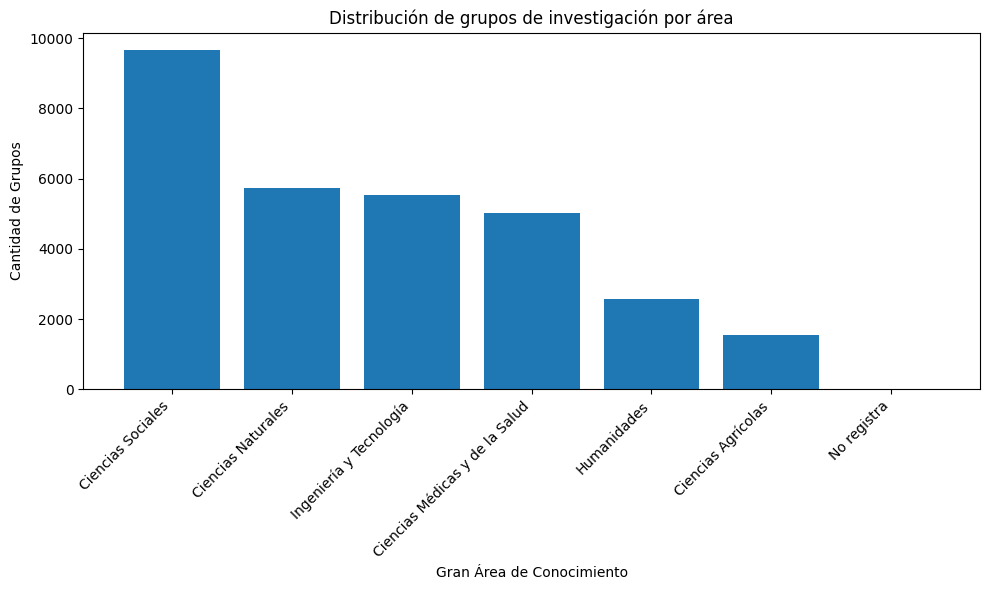

In [ ]:
# 1 grafica Univariada

areas_investigacion = df["NME_GRAN_AREA_GR"].value_counts().reset_index()
areas_investigacion.columns = ["Gran Área de Conocimiento", "Cantidad_Grupos"]

plt.figure(figsize=(10,6))
plt.bar(areas_investigacion["Gran Área de Conocimiento"],areas_investigacion["Cantidad_Grupos"])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Gran Área de Conocimiento")
plt.ylabel("Cantidad de Grupos")
plt.title("Distribución de grupos de investigación por área")
plt.tight_layout()
plt.show()

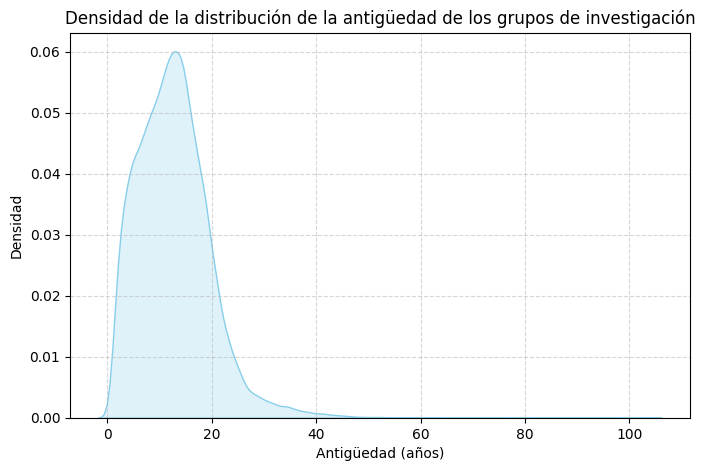

📊 Estadísticas de antigüedad de grupos:
{'mínimo': 0.91, 'máximo': 103.58, 'promedio': np.float64(12.71), 'mediana': 12.16, 'desviación estándar': 6.97}


In [ ]:
# Convertir la columna a numérica y eliminar no numéricos
df["EDAD_ANOS_GR"] = pd.to_numeric(df["EDAD_ANOS_GR"], errors="coerce")
edad_grupos = df["EDAD_ANOS_GR"].dropna()

# Gráfico de densidad
plt.figure(figsize=(8,5))
sns.kdeplot(x=edad_grupos, fill=True, color="skyblue")
plt.title("Densidad de la distribución de la antigüedad de los grupos de investigación")
plt.xlabel("Antigüedad (años)")
plt.ylabel("Densidad")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Estadísticas descriptivas
edad_stats = {
    "mínimo": round(edad_grupos.min(), 2),
    "máximo": round(edad_grupos.max(), 2),
    "promedio": round(edad_grupos.mean(), 2),
    "mediana": round(edad_grupos.median(), 2),
    "desviación estándar": round(edad_grupos.std(), 2)
}

print("📊 Estadísticas de antigüedad de grupos:")
print(edad_stats)

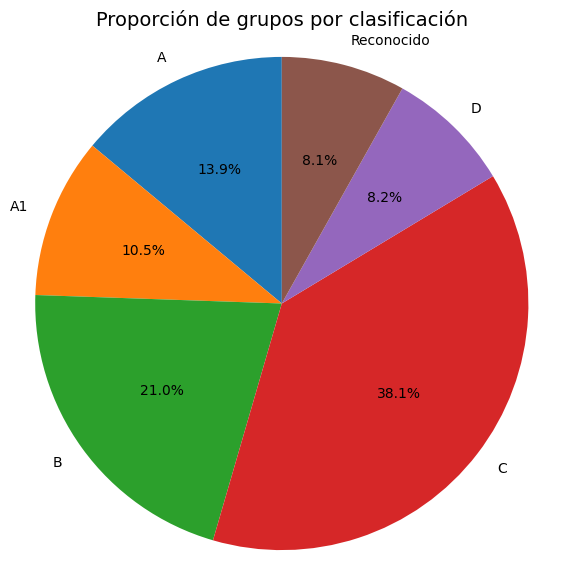

In [ ]:
# Contar grupos por clasificación

clasificacion_counts = df['NME_CLASIFICACION_GR'].value_counts().sort_index()

# Crear gráfico de pastel

plt.figure(figsize=(7,7))
plt.pie(
    clasificacion_counts,
    labels=clasificacion_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Proporción de grupos por clasificación", fontsize=14)
plt.axis('equal')  # Mantener el pastel circular
plt.show()

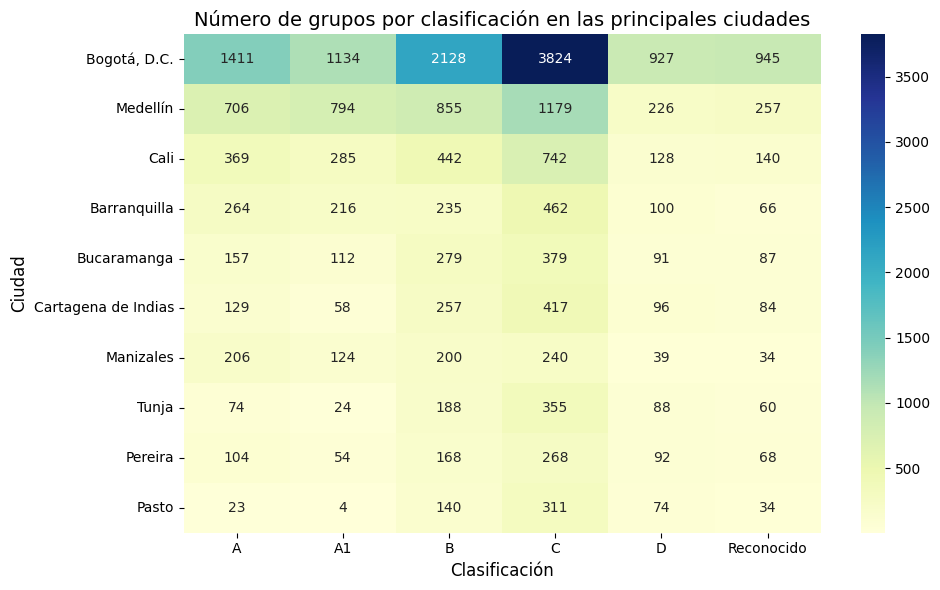

In [ ]:
# 1. grafica Bivariada

#  Creacion de tabla de ciudades y clasificaciones
clas_ciudad = pd.crosstab(df['NME_MUNICIPIO_GR'], df['NME_CLASIFICACION_GR'])

# Filtracion de las 10 ciudades con más grupos

top_ciudades = clas_ciudad.sum(axis=1).sort_values(ascending=False).head(10).index
clas_ciudad_top = clas_ciudad.loc[top_ciudades]

#  Generacion de mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(clas_ciudad_top, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Número de grupos por clasificación en las principales ciudades", fontsize=14)
plt.xlabel("Clasificación", fontsize=12)
plt.ylabel("Ciudad", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('/content/Actores_Reconocidos_SNCTI_20250814.csv')

#  Inspección inicial
print("📌 Información general:")
print(df.info())
print("\n📊 Estadísticas descriptivas:")
print(df.describe())


📌 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No                   135 non-null    int64 
 1   NIT                  135 non-null    object
 2   ORGANIZACIÓN         135 non-null    object
 3   NOMBRE_ACTOR         135 non-null    object
 4   CIUDAD               135 non-null    object
 5   DEPARTAMENTO         135 non-null    object
 6   REGION               135 non-null    object
 7   COD_DANE             135 non-null    int64 
 8   TIPO_RECONOCIMIENTO  135 non-null    object
 9   RECONOCIDO_COMO      135 non-null    object
 10  SECTOR               135 non-null    object
 11  PAGINA_WEB           135 non-null    object
 12  RESOLUCION           135 non-null    object
 13  FECHA_EXPEDICION     135 non-null    object
 14  FECHA_NOTIFICACION   135 non-null    object
 15  VIGENCIA             135 non-null 

In [ ]:
df.head(50)

,No,NIT,ORGANIZACIÓN,NOMBRE_ACTOR,CIUDAD,DEPARTAMENTO,REGION,COD_DANE,TIPO_RECONOCIMIENTO,RECONOCIDO_COMO,SECTOR,PAGINA_WEB,RESOLUCION,FECHA_EXPEDICION,FECHA_NOTIFICACION,VIGENCIA
0,1,890318247-8,Fundación Zoológica De Cali,Fundación Zoológica De Cali,Cali,Valle Del Cauca,Pacífico,76001,Centro de Ciencia,Centro de Ciencia - Autónomo,Apropiación Social De Ctei,https://www.zoologicodecali.com.co/,1317 de 2020,25/11/2020,26/11/2020,26/11/2025
1,2,890480597-2,Fundacion Jardin Botanico Guillermo Piñeres,Fundacion Jardin Botanico Guillermo Piñeres,Turbaco,Bolívar,Caribe,13836,Centro de Ciencia,Centro de Ciencia - Autónomo,Apropiación Social De Ctei,http://www.jbgp.org.co/,1155 de 2021,27/05/2021,27/05/2021,27/05/2024
2,3,899999063 -3,Universidad Nacional De Colombia,Museo Paleontológico De Villa De Leyva,Villa De Leyva,Boyacá,Centro Oriente,15407,Centro de Ciencia,Centro de Ciencia - Dependiente,Apropiación Social De Ctei,http://ciencias.bogota.unal.edu.co/museos-y-ce...,1156 de 2021,27/05/2021,27/05/2021,27/05/2024
3,4,800214750-7,Instituto Técnologico Metropolitano,Museo De Ciencias Naturales De La Salle,Medellín,Antioquia,Eje Cafetero,5001,Centro de Ciencia,Centro de Ciencia - Dependiente,Apropiación Social De Ctei,www.museo.itm.edu.co,2398 de 2021,22/11/2021,23/11/2021,22/11/2026
4,5,900285176-5,Fundación Zoocriadero De Mariposas Andoke,Fundación Zoocriadero De Mariposas Andoke,Cali,Valle Del Cauca,Pacífico,76001,Centro de Ciencia,Centro de Ciencia - Autónomo,Apropiación Social De Ctei,http://andoke.com.co/,2632 de 2021,14/12/2021,15/12/2021,15/12/2024
5,6,899999063 -3,Universidad Nacional De Colombia,Jardín Botánico De La Universidad Nacional De ...,San Andrés,San Andrés,Caribe,88001,Centro de Ciencia,Centro de Ciencia - Dependiente,Apropiación Social De Ctei,https://www.facebook.com/JardinBotanicoSanAndres/,2835 de 2021,21/12/2021,21/12/2021,21/12/2024
6,7,891480035-9,Universidad Tecnológica De Pereira,Jardin Botánico De La Universidad De Pereira,Pereira,Risaralda,Eje Cafetero,66001,Centro de Ciencia,Centro de Ciencia - Dependiente,Apropiación Social De Ctei,https://www2.utp.edu.co/jardin/,0059 de 2022,28/01/2022,28/01/2022,28/01/2027
7,8,800199708-2,Fundación Botánica Y Zoológica De Barranquilla,Fundación Botánica Y Zoológica De Barranquilla,Barranquilla,Atlántico,Caribe,8001,Centro de Ciencia,Centro de Ciencia - Autónomo,Apropiación Social De Ctei,https://www.zoobaq.org/index.php,0141 de 2022,21/02/2022,21/02/2022,21/02/2025
8,9,899999063 -3,Universidad Nacional De Colombia,Museo Entomológico Francisco Luis Gallego,Medellín,Antioquia,Eje Cafetero,5001,Centro de Ciencia,Centro de Ciencia - Dependiente,Apropiación Social De Ctei,https://ciencias.medellin.unal.edu.co/museos/e...,0649 de 2022,30/06/2022,30/06/2022,30/06/2025
9,10,899999063 -3,Universidad Nacional De Colombia,Museo De Historia Natural,"Bogotá, D.C.",Bogotá,Distrito Capital,11001,Centro de Ciencia,Centro de Ciencia - Dependiente,Apropiación Social De Ctei,http://ciencias.bogota.unal.edu.co/museos-y-ce...,0651 de 022,30/06/2022,30/06/2022,30/06/2025


In [ ]:
df.isnull().sum()

,0
No,0
NIT,0
ORGANIZACIÓN,0
NOMBRE_ACTOR,0
CIUDAD,0
DEPARTAMENTO,0
REGION,0
COD_DANE,0
TIPO_RECONOCIMIENTO,0
RECONOCIDO_COMO,0


In [ ]:
# Variables Normalizadas

#  Seleccionar solo columnas numéricas
df_numericas = df.select_dtypes(include=["int64", "float64"])

# Normalización Min-Max (valores entre 0 y 1)
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_numericas),
                         columns=df_numericas.columns)

# 4. Estandarización Z-score (media=0, desviación estándar=1)
scaler_std = StandardScaler()
df_std = pd.DataFrame(scaler_std.fit_transform(df_numericas),
                      columns=df_numericas.columns)

# 5. Mostrar ejemplos
print("Normalización Min-Max:")
print(df_minmax.head())

print("\nEstandarización Z-score:")
print(df_std.head())


Normalización Min-Max:
         No  COD_DANE
0  0.000000  0.825581
1  0.007463  0.102733
2  0.014925  0.121000
3  0.022388  0.000000
4  0.029851  0.825581

Estandarización Z-score:
         No  COD_DANE
0 -1.719268  2.025645
1 -1.693607 -0.403606
2 -1.667947 -0.342215
3 -1.642286 -0.748855
4 -1.616625  2.025645


In [ ]:
# --- Treemap interactivo ---
import plotly.express as px
fig = px.treemap(
    df,
    path=["CIUDAD", "NOMBRE_ACTOR"],  # Jerarquía: Ciudad -> Actor
    values=None,  # Todos del mismo tamaño
    color="CIUDAD",  # Colores según ciudad
    title="Treemap de actores reconocidos por ciudad",
    width=1000,
    height=700
)

# Mostrar gráfico
fig.show()